In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from classes.EjerlejlighedData import getEjerlejlighedData, getEjerlejlighedDataRaw, trainModel, testModel, saveModel, loadModel


In [2]:
data = getEjerlejlighedData()
data.describe()

Cleaning
[{'name': 'Ydervæg', 'uniques': ['Andet materiale', 'Betonelementer', 'Bindingsværk', 'Fibercement herunder asbest', 'Fibercement uden asbest', 'Glas', 'Ingen', 'Letbetonsten', 'Metal', 'Mursten', 'Træ']}, {'name': 'Tag', 'uniques': ['Andet materiale', 'Betontagsten', 'Fibercement herunder asbest', 'Fibercement uden asbest', 'Glas', 'Levende tage', 'Metal', 'Plastmaterialer', 'Stråtag', 'Tagpap med lille hældning', 'Tagpap med stor hældning', 'Tegl']}, {'name': 'Varmeinstallation', 'uniques': ['Blandet', 'Centralvarme med to fyringsenheder', 'Centralvarme med én fyringsenhed', 'Elvarme', 'Fjernvarme blokvarme', 'Ingen varmeinstallation', 'Ovn til fast og flydende brændsel', 'Varmepumpe']}, {'name': 'Energimærke', 'uniques': ['0', 'A', 'A1', 'A10', 'A15', 'A2', 'A20', 'B', 'C', 'D', 'E', 'F', 'G']}]


,Adresse,Year build,Pris,Energimærke,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Etager,Seneste ombygning,Varmeinstallation,Ejendomsværdiskat,Grundskyld
count,4189.000000,4189.000000,4.189000e+03,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000,4189.000000
mean,4874.681786,1948.383624,2.895683e+06,8.011936,3067.707806,93.200048,2.944856,1.139174,1.066842,7.717116,7.591072,4.426593,472.044879,3.811411,8503.023156,4388.788971
std,2777.307303,130.392590,1.890273e+06,2.130721,1304.412884,67.187165,1.314843,0.533917,0.315655,2.923646,3.927060,3.538999,847.001922,0.629013,6240.248517,4764.745342
min,1008.000000,0.000000,7.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.000000,1928.000000,1.547000e+06,8.000000,2138.000000,65.000000,2.000000,1.000000,1.000000,9.000000,2.000000,2.000000,0.000000,4.000000,4800.000000,1558.000000
50%,3460.000000,1961.000000,2.350000e+06,9.000000,2826.000000,85.000000,3.000000,1.000000,1.000000,9.000000,9.000000,3.000000,0.000000,4.000000,7300.000000,3094.000000
75%,8000.000000,1992.000000,3.798000e+06,9.000000,3779.000000,109.000000,4.000000,1.000000,1.000000,9.000000,11.000000,5.000000,0.000000,4.000000,11550.000000,5596.000000
max,9990.000000,2022.000000,9.495000e+06,12.000000,11732.000000,1392.000000,20.000000,11.000000,4.000000,10.000000,11.000000,30.000000,2020.000000,7.000000,63625.000000,70662.000000


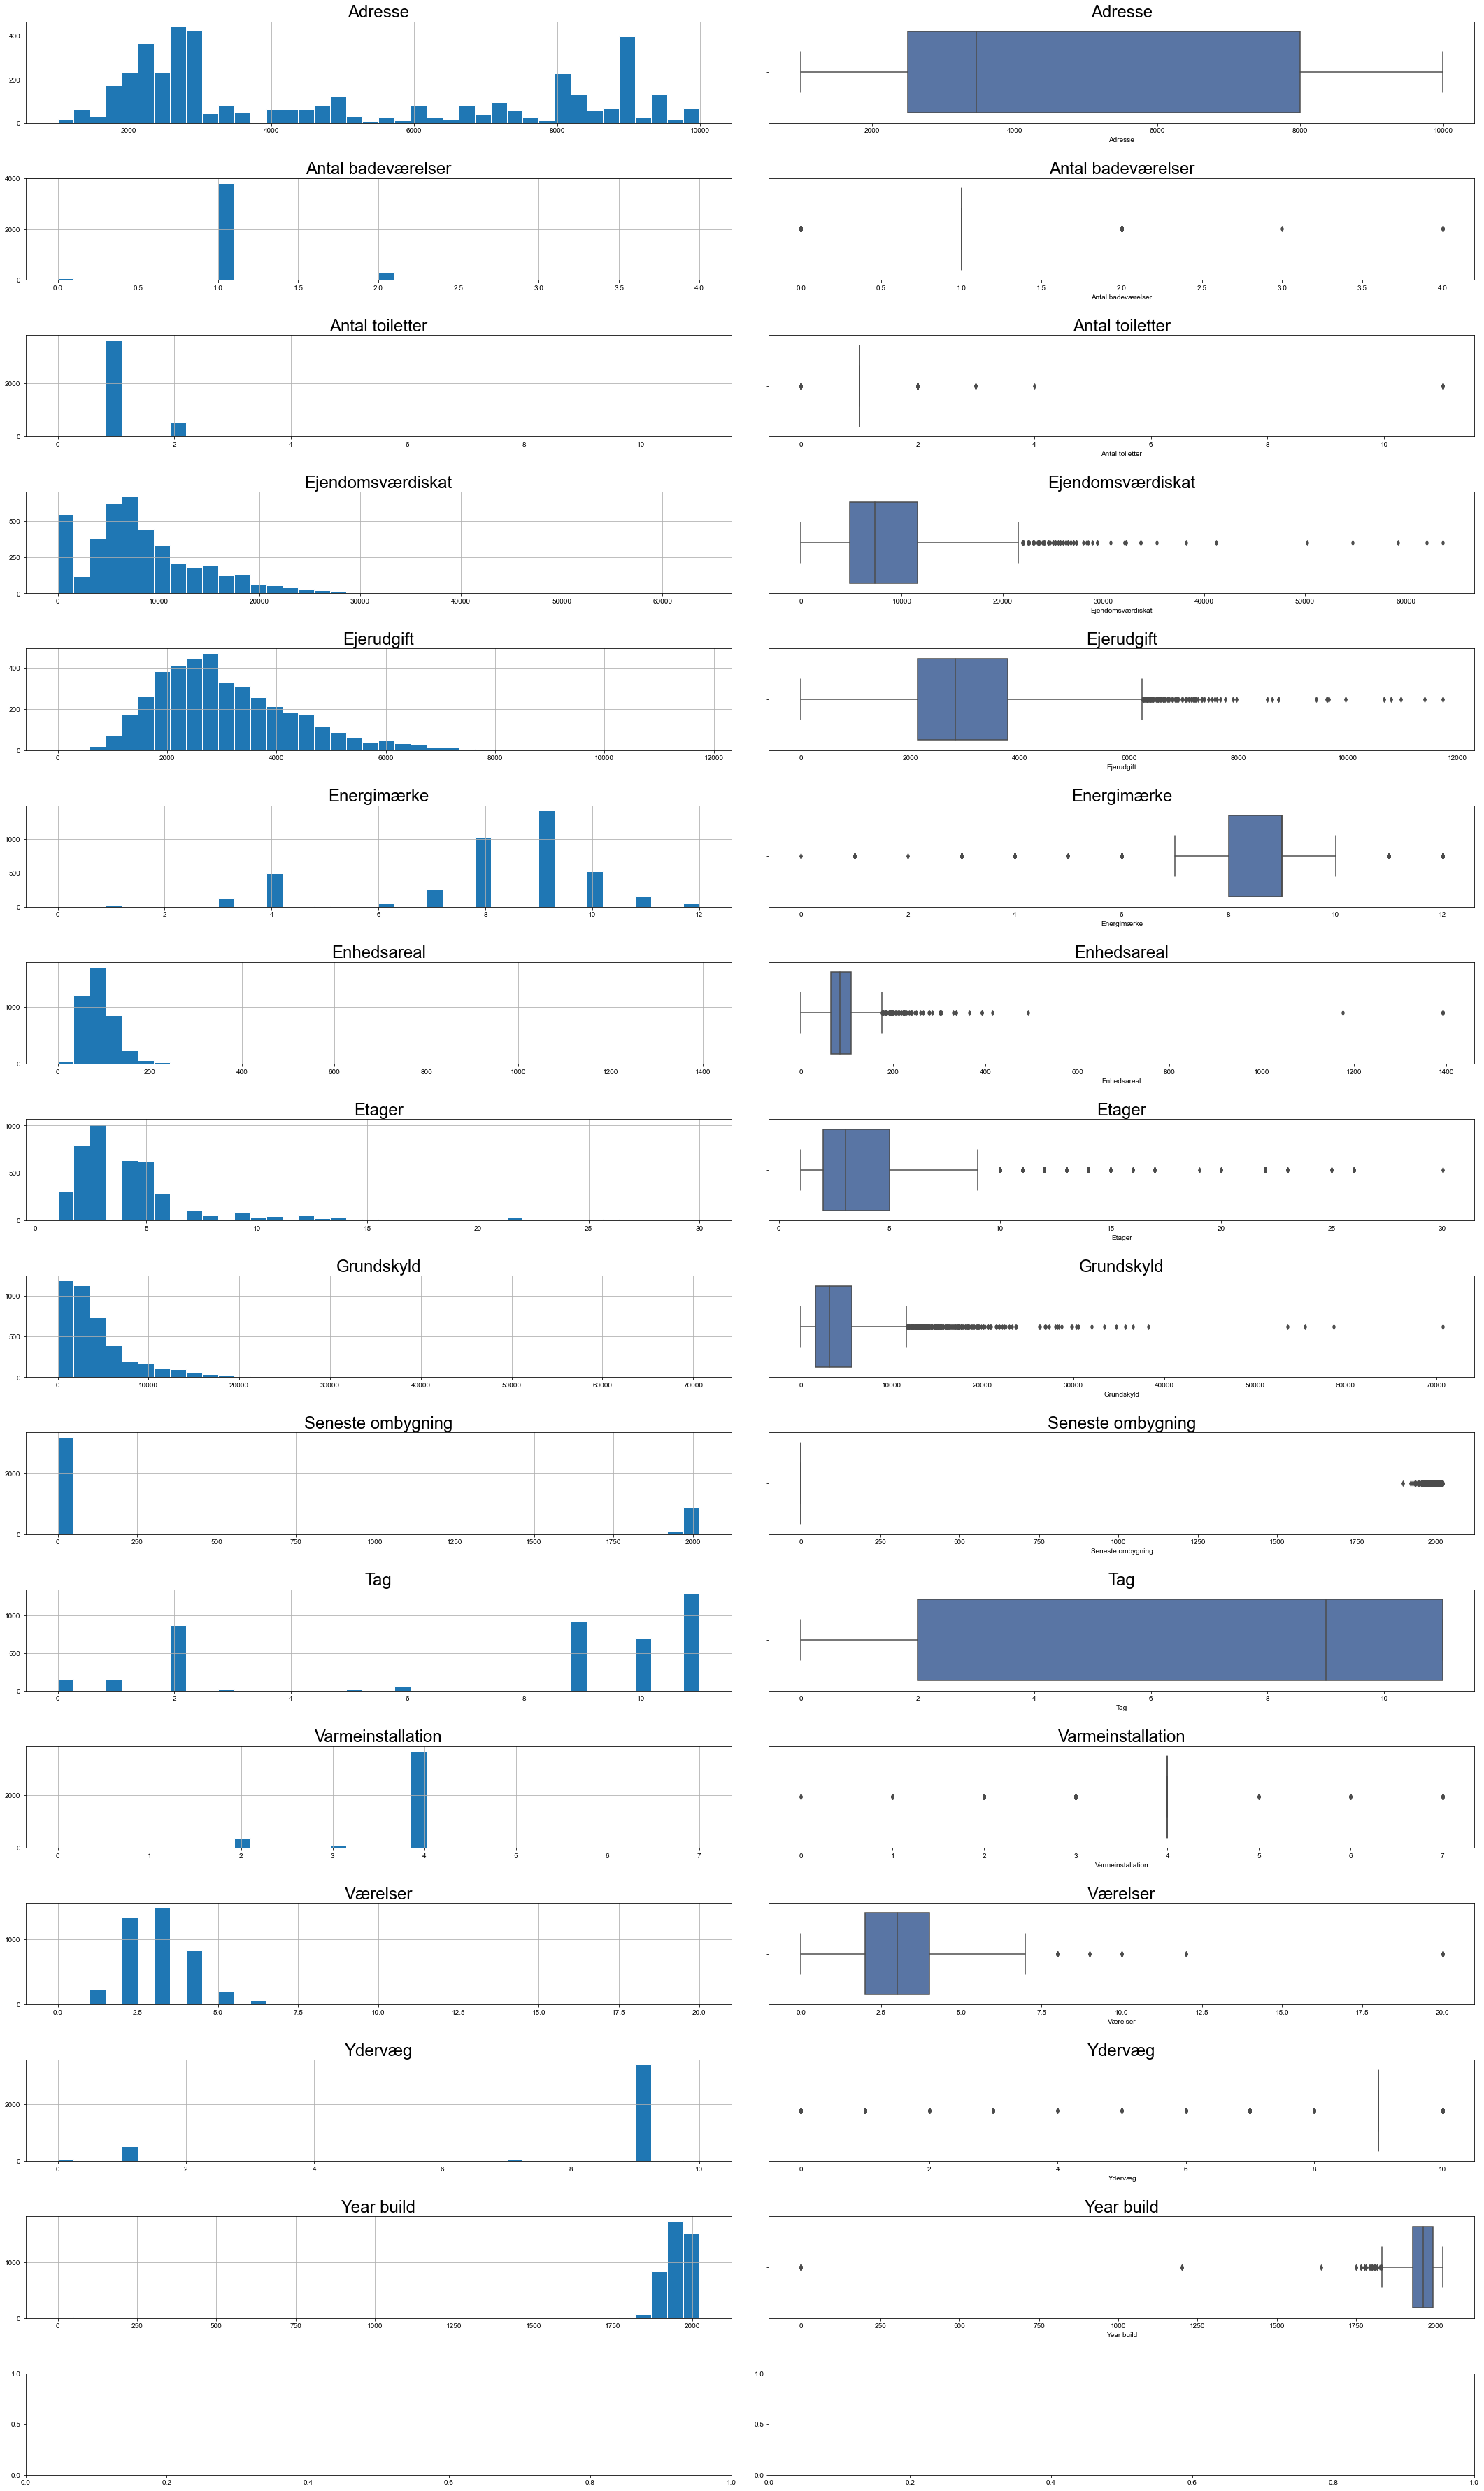

In [3]:
columns = np.setdiff1d(data.columns.to_numpy(),'Pris')
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(30,50))
sb.set(font_scale=2)

for col in enumerate(columns):
    data[col[1]].hist(ax=axes[col[0],0], bins=40);
    axes[col[0],0].set_title(col[1])
    sb.boxplot(ax=axes[col[0],1], x=data[col[1]])
    axes[col[0],1].set_title(col[1])

plt.tight_layout()

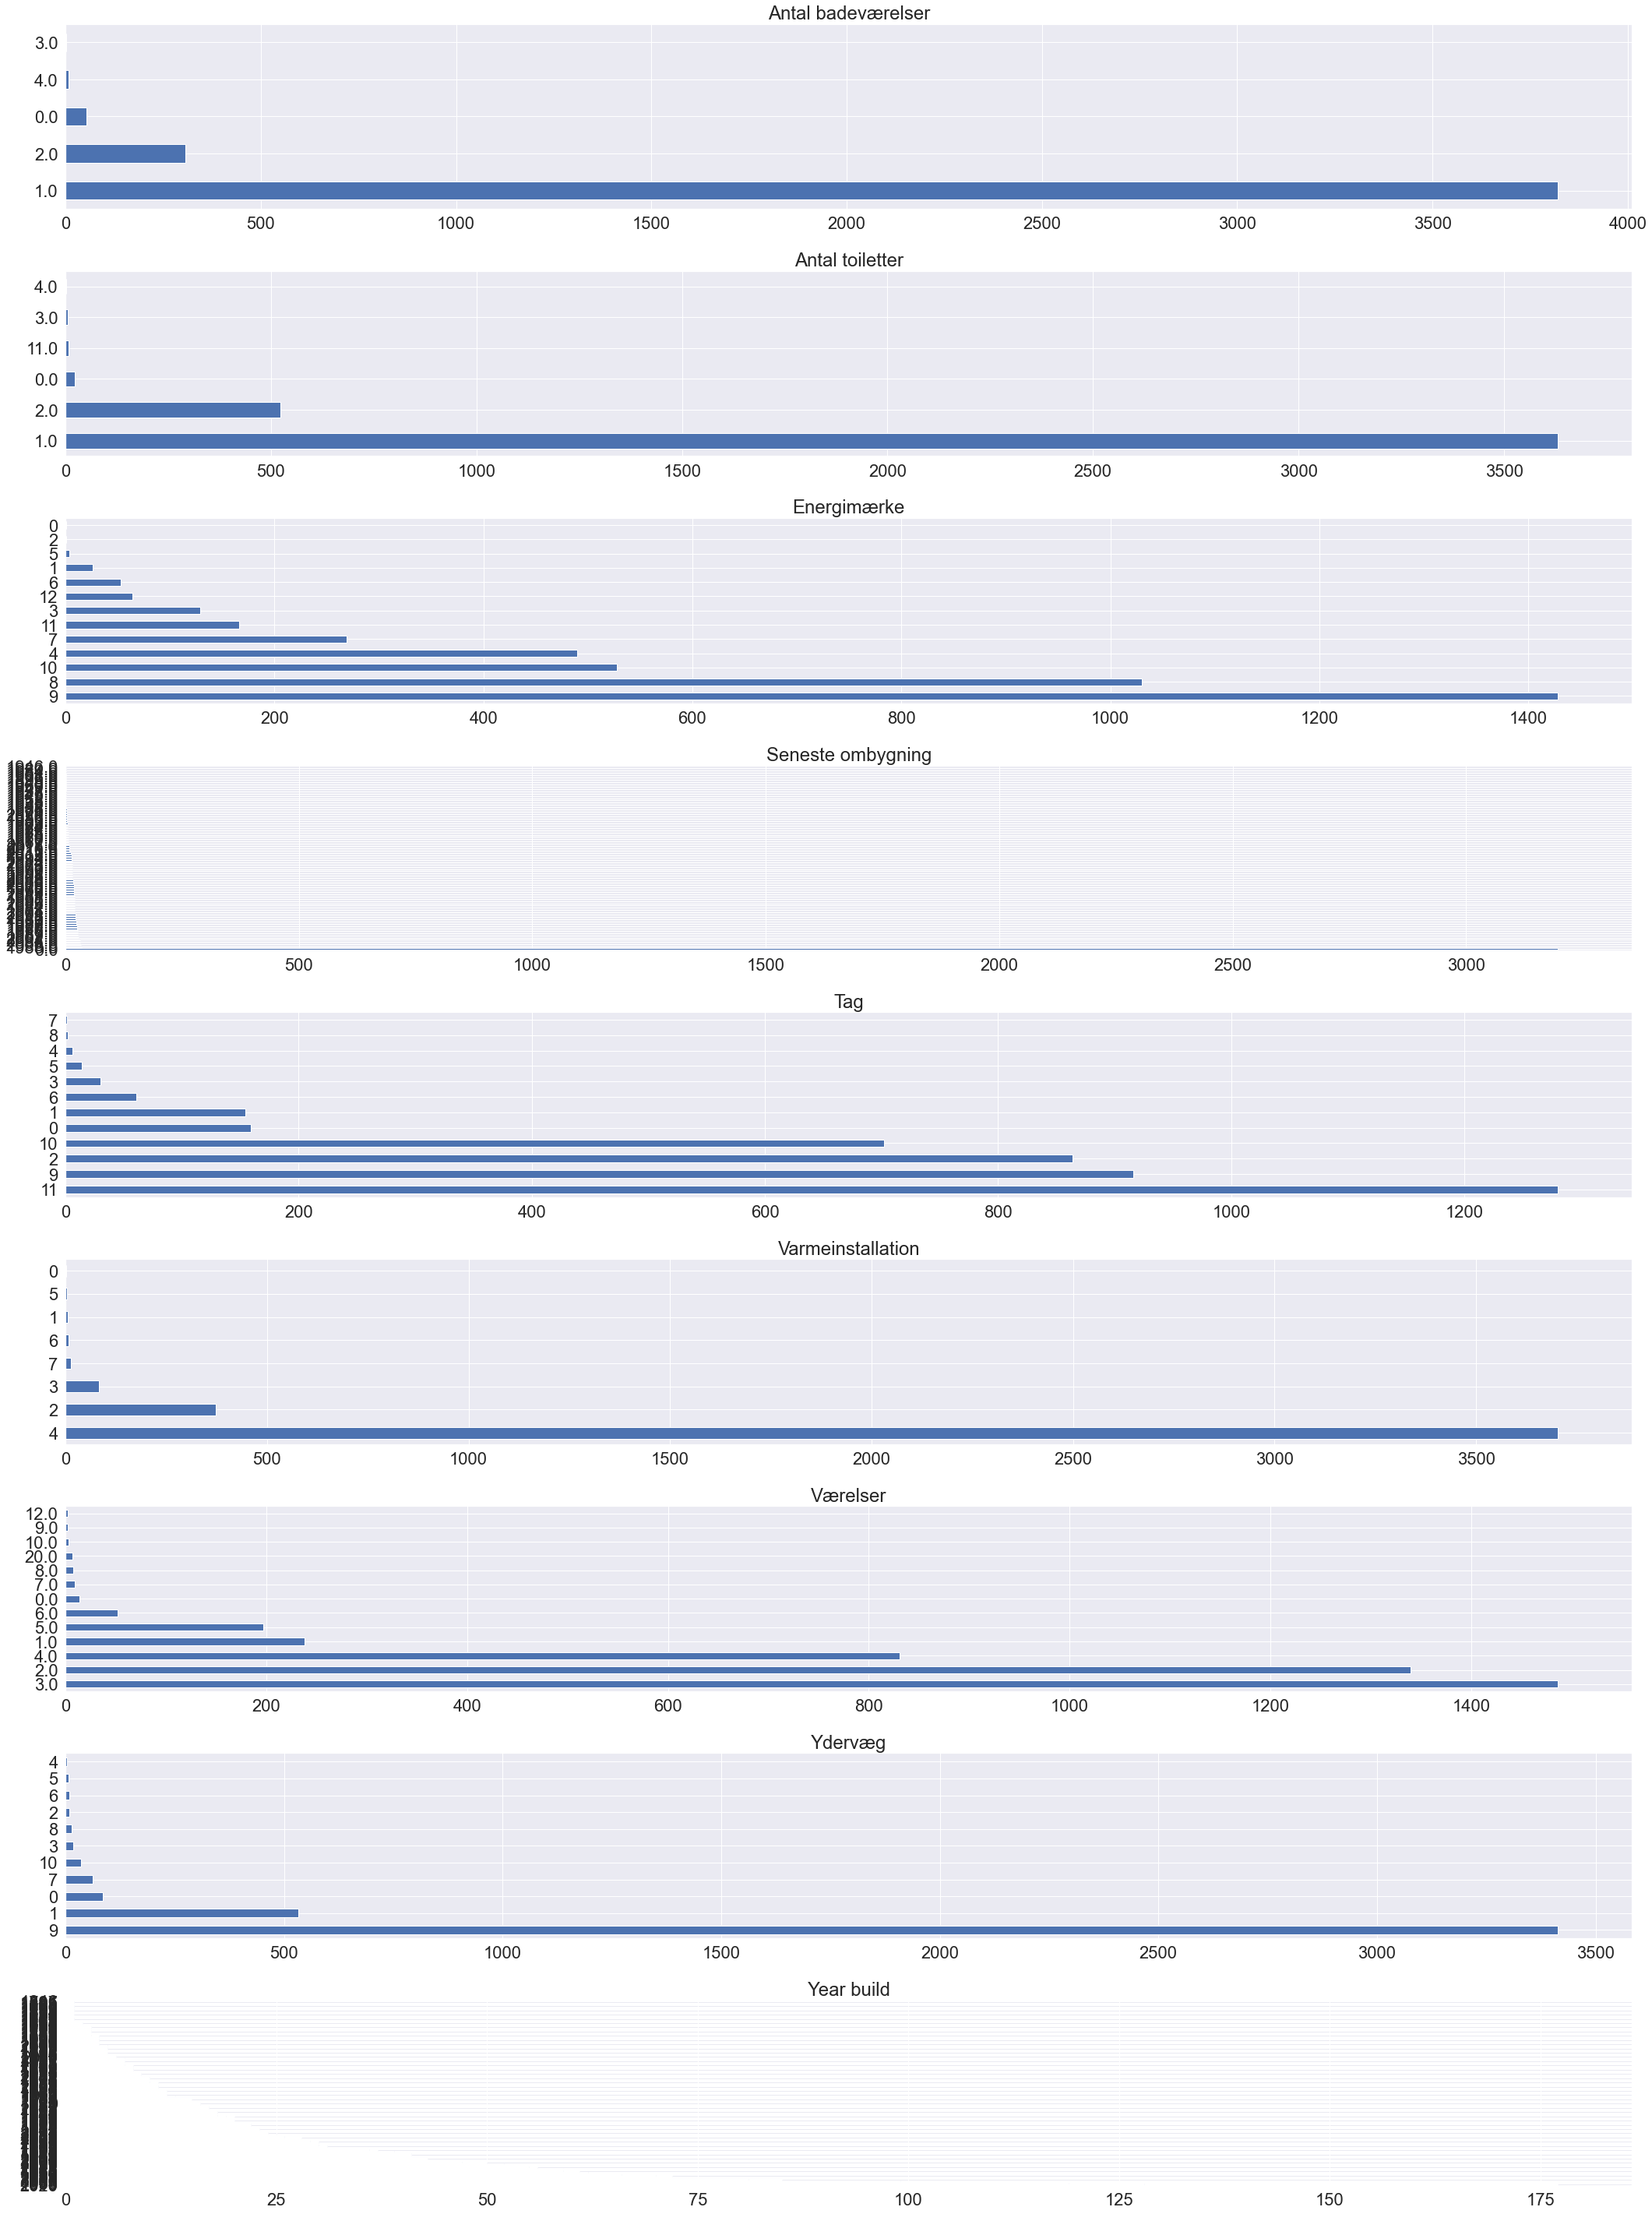

In [4]:
columns = ['Antal badeværelser', 'Antal toiletter', 'Energimærke','Seneste ombygning', 'Tag', 'Varmeinstallation', 'Værelser', 'Ydervæg','Year build']
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(30,40))
sb.set(font_scale=2)

for col in enumerate(columns):
    pd.value_counts(data[col[1]]).plot(kind='barh',ax=axes[col[0]])
    axes[col[0]].set_title(col[1]);
    
plt.tight_layout()

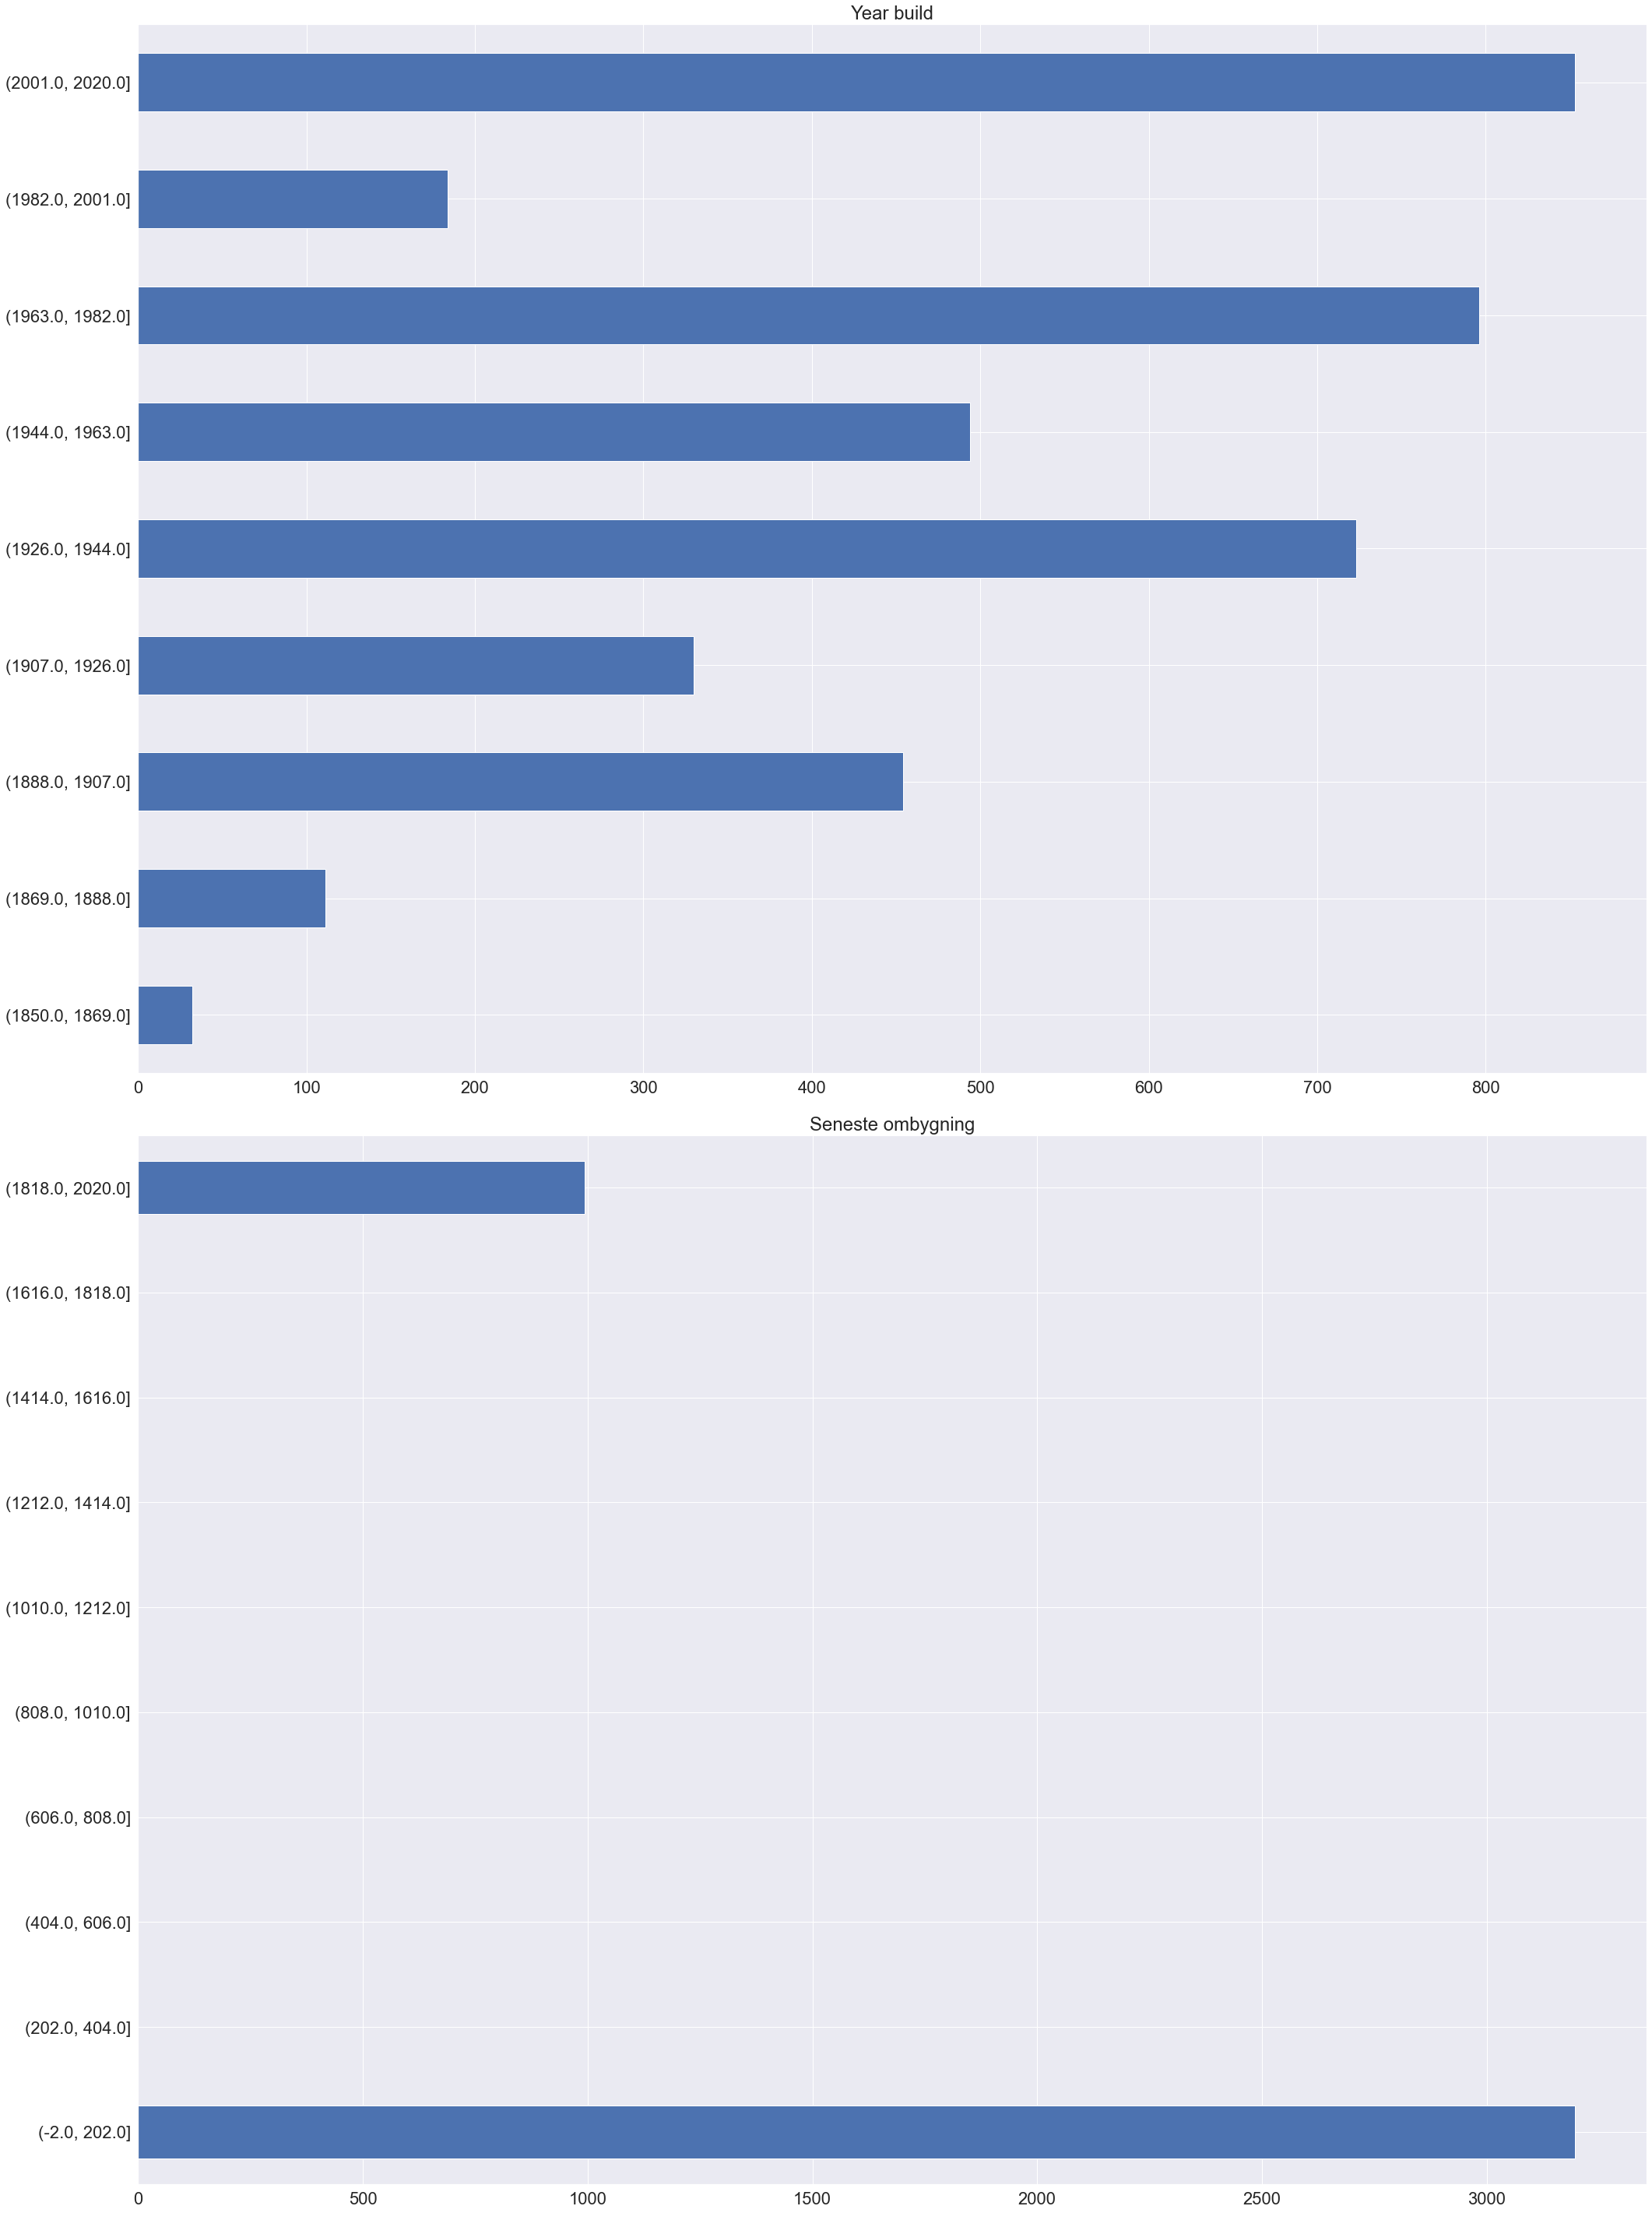

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,40))
sb.set(font_scale=2)

bins = np.linspace(1850, 2020, 10)
pd.value_counts(pd.cut(data['Year build'], bins=bins, precision=0), sort=False).plot(kind='barh',ax=axes[0])
axes[0].set_title('Year build');

bins = np.linspace(1850, 2020, 10)
pd.value_counts(pd.cut(data['Seneste ombygning'], 10, precision=0), sort=False).plot(kind='barh',ax=axes[1])
axes[1].set_title('Seneste ombygning');



plt.tight_layout()

In [6]:
trainModel()

Data is already cleaned
Model trained


In [7]:
testModel()

0.7266844106883151

In [8]:
x,y=saveModel()

Model saved!
